# Practical: Optimization Algorithms
In this practical, we will first use `scipy.optimize` to solve some optimization problems.

## Local Optimization
You can use `scipy.optimize.minimize` to solve local optimization problems. The function `minimize` has the following signature:
```python
minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
```
where:
- `fun` is the objective function to be minimized.
- `x0` is the initial guess.
- `args` is a tuple of additional arguments to pass to the objective function.
- `method` is the optimization method to use. If `None`, the method is automatically selected.
- `jac` is the Jacobian of the objective function.
- `hess` is the Hessian of the objective function.
- `hessp` is a function that computes the Hessian times an arbitrary vector.
- `bounds` is a sequence of `(min, max)` pairs for each element in `x`, defining the bounds on that parameter.
- `constraints` is a sequence of constraint definitions.
- `tol` is the tolerance for termination.
- `callback` is a function that is called after each iteration.
- `options` is a dictionary of solver options. 

The function returns an `OptimizeResult` object that contains the solution.

In [1]:
#Import libraries
import numpy as np
from scipy.optimize import minimize

#Objective function and two constraints
def objective(x):
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    x4 = x[3]
    return x1*x4*(x1+x2+x3)+x3

def constraint1(x):
    return x[0]*x[1]*x[2]*x[3]-25.0

def constraint2(x):
    sum_sq = 40
    for i in range(4):
        sum_sq = sum_sq - x[i]**2
    return sum_sq


In [2]:
#Initial guess
x0 = [1,0,5,2]

print(objective(x0))

#setting boundries and constraints
b = (1.0,5.0)
bnds = (b,b,b,b)
con1 = {'type': 'ineq', 'fun': constraint1}
con2 = {'type': 'eq', 'fun': constraint2}
cons = ([con1,con2])

17


SLSQP optimizer is a sequential least squares programming algorithm which uses the Han-Powell quasi-Newton method with a BFGS update of the B-matrix and an L1-test function in the step-length algorithm. The optimizer uses the gradient of the objective function.

In [3]:
#The optimization problem is solved using the SLSQP method as:
solution = minimize(objective,x0,method='SLSQP',bounds=bnds,constraints=cons)
x = solution.x
# show final objective
print('Final Objective: ' + str(objective(x)))

# print solution
print('Solution')
print('x1 = ' + str(x[0]))
print('x2 = ' + str(x[1]))
print('x3 = ' + str(x[2]))
print('x4 = ' + str(x[3]))

Final Objective: 17.014016989977186
Solution
x1 = 1.0
x2 = 4.7429980838345545
x3 = 3.821152061978548
x4 = 1.379407969015844


## Basin Hopping
Basin hopping is a global optimization algorithm that iteratively performs local minimization on a random perturbation of the coordinates of the system. The algorithm is based on the observation that the potential energy surface of a system can be viewed as a landscape of local minima separated by barriers. The algorithm starts with an initial configuration of the system and performs a local minimization to find a local minimum. It then perturbs the coordinates of the system and performs another local minimization. This process is repeated until a stopping criterion is met. The algorithm is called basin hopping because it is like rolling a ball down a hill and hopping from one basin to another.

We can use `scipy.optimize.basinhopping` to perform basin hopping. The function `basinhopping` has the following signature:
```python
basinhopping(func, x0, niter=100, T=1.0, stepsize=0.5, minimizer_kwargs=None, take_step=None, accept_test=None, callback=None, interval=50, disp=False, niter_success=None, seed=None)
```
where:
- `func` is the objective function to be minimized.
- `x0` is the initial guess.
- `niter` is the number of iterations.
- `T` is the temperature parameter.
- `stepsize` is the step size for the random perturbation.
- `minimizer_kwargs` is a dictionary of keyword arguments to pass to the local minimizer.
- `take_step` is a function that generates a random perturbation of the coordinates.
- `accept_test` is a function that determines whether to accept the new configuration.
- `callback` is a function that is called after each iteration.
- `interval` is the interval for displaying information.
- `disp` is a flag to display information.
- `niter_success` is the number of successful iterations.
- `seed` is the random seed.

The function returns an `OptimizeResult` object that contains the solution.


In [4]:
from scipy.optimize import basinhopping
import numpy as np
from matplotlib import pyplot as plt

func = lambda x: np.cos(14.5 * x - 0.3) + (x + 0.2) * x
x0=[1.]
minimizer_kwargs = {"method": "BFGS"}
basinhopping(func, x0, minimizer_kwargs=minimizer_kwargs, niter=200)




                    message: ['requested number of basinhopping iterations completed successfully']
                    success: True
                        fun: -1.0008761844426555
                          x: [-1.951e-01]
                        nit: 200
      minimization_failures: 0
                       nfev: 3068
                       njev: 1534
 lowest_optimization_result:  message: Optimization terminated successfully.
                              success: True
                               status: 0
                                  fun: -1.0008761844426555
                                    x: [-1.951e-01]
                                  nit: 3
                                  jac: [ 1.788e-06]
                             hess_inv: [[ 4.712e-03]]
                                 nfev: 14
                                 njev: 7

global minimum: x = -0.1951, f(x0) = -1.0009


/var/folders/b4/hm0mlm2x6_g1cbpp4c29f62h0000gn/T/ipykernel_55714/1651120145.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("global minimum: x = %.4f, f(x0) = %.4f" % (ret.x, ret.fun))


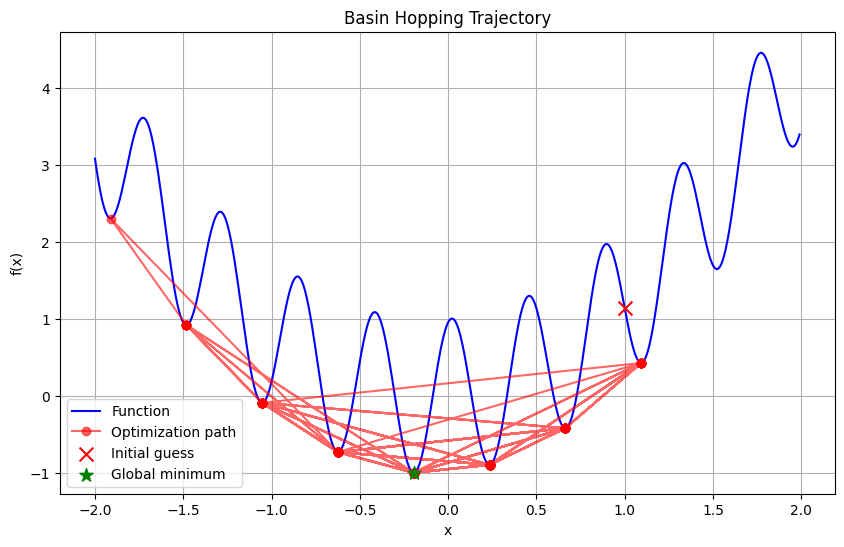

In [12]:
# Store the trajectory of points visited
visited_points = []

def callback(x, f, accept):
    visited_points.append((x[0], f))
    return False  # Don't stop optimization

# Run basinhopping with callback
ret = basinhopping(func, x0, minimizer_kwargs=minimizer_kwargs, niter=200, callback=callback)
print("global minimum: x = %.4f, f(x0) = %.4f" % (ret.x, ret.fun))

# Generate points for plotting the function
x_vals = np.arange(-2, 2, 0.01)
y_vals = np.cos(14.5 * x_vals - 0.3) + (x_vals + 0.2) * x_vals

# Get x and y values from visited points
trajectory_x = [point[0] for point in visited_points]
trajectory_y = [point[1] for point in visited_points]

# Plot function and trajectory
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, 'b-', label='Function')
plt.plot(trajectory_x, trajectory_y, 'ro-', label='Optimization path', alpha=0.6)
plt.scatter(1, func(1), color='red', s=100, marker='x', label='Initial guess', zorder=5)
plt.scatter(ret.x, ret.fun, color='green', s=100, marker='*', label='Global minimum', zorder=5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Basin Hopping Trajectory')
plt.legend()
plt.grid(True)
plt.show()


## Geometry Optimization
In this section, we will do geometry optimization of Barium Titanate (BaTiO3) using the `ase` library. We will use the `LBFGS` algorithm to minimize the energy of the system.

### Why Geometry Optimization?
Geometry optimization is the process of finding the equilibrium geometry of a system by minimizing its energy with respect to the atomic positions. The equilibrium geometry is the configuration of the system that corresponds to the lowest energy. Geometry optimization is an important step in computational chemistry and materials science because it allows us to predict the structure of a material and its properties.


### Machine Learning Force Field
The force field we will use is a machine learning force field trained using Materials Project data. It is also called foundation model. The details of this force field will be covered in the later lecture. The force field is MACE (multi-atomic cluster expansion) and we need to install it using the cell below:

In [ ]:
!pip install mace-torch --upgrade

In [13]:
from ase import Atoms

# Create a BaTiO3 perovskite crystal
a = 4.0  # Lattice parameter in Angstrom
# BaTiO3 has a perovskite structure with Ba at corners, Ti at center, and O at face centers
symbols = ['Ba', 'Ti', 'O', 'O', 'O']
positions = [
    (0.0, 0.0, 0.0),       # Ba at corner
    (0.5, 0.5, 0.5),       # Ti at body center
    (0.5, 0.5, 0.0),       # O at face centers
    (0.5, 0.0, 0.5),
    (0.0, 0.5, 0.5)
]
atoms = Atoms(symbols=symbols,
           positions=[(x*a, y*a, z*a) for x, y, z in positions],
           cell=[(a, 0, 0), (0, a, 0), (0, 0, a)],
           pbc=True)  # periodic boundary conditions

# Create a supercell
# atoms = atoms.repeat((2, 2, 2))



Below we first apply some random perturbation to the initial structure and then perform geometry optimization using the `LBFGS` algorithm.

In [15]:
from ase.optimize import LBFGS
import numpy as np
from mace.calculators.foundations_models import mace_mp
from ase.filters import UnitCellFilter

# Add some random displacements to the atoms
rng = np.random.default_rng(42)  # For reproducibility
positions = atoms.get_positions()
displacements = rng.random((len(atoms), 3)) * 0.1  # Random displacements up to 0.1 Å
atoms.set_positions(positions + displacements)

# Set the calculator
atoms.calc = mace_mp(model='medium',device='cpu', dtype='float64')

# Lists to store energy and forces during optimization
energies = []
max_forces = []
volumes = []
# Define a function to collect data at each step
def log_data(atoms=atoms):
    # Record energy and forces
    energies.append(atoms.get_potential_energy())
    forces = atoms.get_forces()
    max_forces.append(np.max(np.abs(forces)))
    
    # Record volume
    volumes.append(atoms.get_cell().volume)
    
# Run the optimization with attached observer
# Setup unit cell filter to optimize both positions and cell
atoms_to_opt = UnitCellFilter(atoms)

# Run the optimization with the filter
dyn = LBFGS(atoms_to_opt)
dyn.attach(log_data)
dyn.run(fmax=0.01)  # Converge until forces are less than 0.01 eV/Å

# Print the optimized energy
print(f"Final energy: {atoms.get_potential_energy()} eV")
print(f"Final forces: {np.max(np.abs(atoms.get_forces()))} eV/Å (max component)")

print(f"Final lattice parameter: {atoms.get_cell_lengths_and_angles()[0]} Å")
print(f"Final volume: {atoms.get_volume()} Å^3")



Using Materials Project MACE for MACECalculator with /Users/zeyudeng/.cache/mace/20231203mace128L1_epoch199model
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.
Default dtype float32 does not match model dtype float64, converting models to float32.


/Users/zeyudeng/apps/matsci/lib/python3.12/site-packages/mace/calculators/mace.py:139: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=model_path, map_location=de

       Step     Time          Energy          fmax
LBFGS:    0 23:23:53      -39.949074        0.578590
LBFGS:    1 23:23:53      -39.963398        0.492534
LBFGS:    2 23:23:53      -40.003666        0.207855
LBFGS:    3 23:23:53      -40.005711        0.232885
LBFGS:    4 23:23:53      -40.018383        0.267260
LBFGS:    5 23:23:53      -40.023323        0.189266
LBFGS:    6 23:23:54      -40.026997        0.142208
LBFGS:    7 23:23:54      -40.029591        0.107784
LBFGS:    8 23:23:54      -40.030685        0.097366
LBFGS:    9 23:23:54      -40.034306        0.087341
LBFGS:   10 23:23:54      -40.035400        0.092247
LBFGS:   11 23:23:54      -40.036201        0.072455
LBFGS:   12 23:23:54      -40.036747        0.072380
LBFGS:   13 23:23:54      -40.037567        0.068618
LBFGS:   14 23:23:54      -40.038017        0.047601
LBFGS:   15 23:23:54      -40.038200        0.043207
LBFGS:   16 23:23:54      -40.038288        0.034696
LBFGS:   17 23:23:54      -40.038380        0.02

/var/folders/b4/hm0mlm2x6_g1cbpp4c29f62h0000gn/T/ipykernel_11482/757310599.py:42: DeprecationWarning: Please use atoms.cell.cellpar() instead
  print(f"Final lattice parameter: {atoms.get_cell_lengths_and_angles()[0]} Å")


Then we can visualize the results:

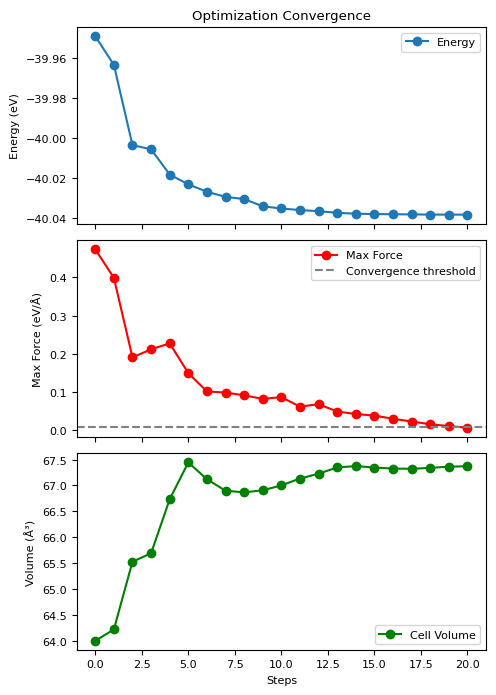

In [16]:
import matplotlib.pyplot as plt

# Plot energy, forces, and volume vs. steps
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(5, 7), sharex=True)

# Plot energy
ax1.plot(energies, 'o-', label='Energy')
# Add experimental value for energy
ax1.set_ylabel('Energy (eV)')
ax1.set_title('Optimization Convergence')
ax1.legend()

# Plot max force
ax2.plot(max_forces, 'o-', color='red', label='Max Force')
ax2.set_ylabel('Max Force (eV/Å)')
ax2.axhline(0.01, color='gray', linestyle='--', label='Convergence threshold')
ax2.legend()

# Plot volume
ax3.plot(volumes, 'o-', color='green', label='Cell Volume')
# Add experimental value for volume
ax3.set_xlabel('Steps')
ax3.set_ylabel('Volume (Å³)')
ax3.legend()

plt.tight_layout()
plt.show()